In [1]:
#get dataset:
!curl --create-dirs -o './data/housing.csv' "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1390k  100 1390k    0     0  5766k      0 --:--:-- --:--:-- --:--:-- 5792k


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## DATA PREPARATION

In [3]:
'''
Select only the features from above and fill in the missing values with 0.
Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
Create a new column population_per_household by dividing the column population by the column households from dataframe.
'''

df.fillna(0., inplace=True)
df['rooms_per_household'] = df.total_rooms/df.households
df['bedrooms_per_room'] = df.total_bedrooms/df.total_rooms
df['population_per_household'] = df.population/df.households


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


#### Question 1
##### What is the most frequent observation (mode) for the column ocean_proximity?

In [5]:
df.ocean_proximity.value_counts().index[0]

'<1H OCEAN'

##### Question 2
###### Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?


Biggest Correlation: total_bedrooms and households


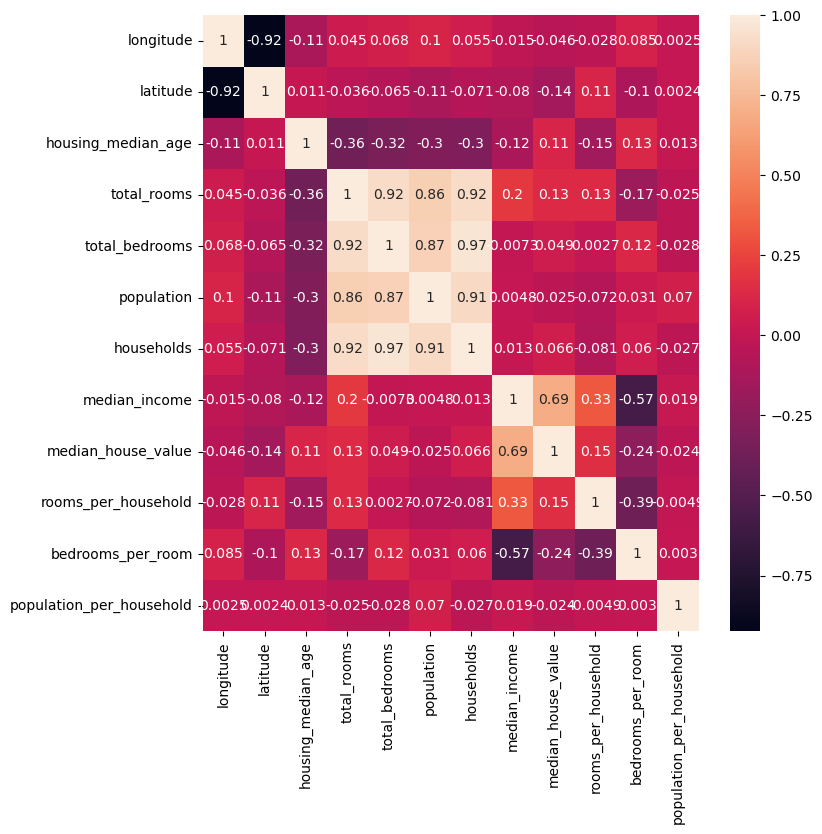

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
print("Biggest Correlation: total_bedrooms and households")

In [7]:
#Make median_house_value binary
#We need to turn the median_house_value variable from numeric into binary.
#Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

df['above_average'] = (df.median_house_value > df.median_house_value.mean()).astype(int)


In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


In [9]:
#Split the data
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
#Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
#Make sure that the target value (median_house_value) is not in your dataframe.

from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=.20, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=.25, random_state=42)
print(f'Records in df_train_full: {df_train.shape[0]}, df_test: {df_test.shape[0]}, df_val: {df_val.shape[0]}')

df_train = df_train.reset_index(drop=True)
df_val= df_val.reset_index(drop=True)
df_test= df_test.reset_index(drop=True)

Records in df_train_full: 12384, df_test: 4128, df_val: 4128


In [10]:
print(f'Records in df_train_full: {df_train.shape[0]}, df_test: {df_test.shape[0]}, df_val: {df_val.shape[0]}')


Records in df_train_full: 12384, df_test: 4128, df_val: 4128


#### Question 3
##### Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
#Round it to 2 decimals using round(score, 2)
#What is their mutual information score?

In [11]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df['ocean_proximity'], df['above_average']).round(2)

0.1

In [24]:
#remove 'median_house_value'
original_cols = ['longitude',
             'latitude',
             'housing_median_age',
             'total_rooms',
             'total_bedrooms',
             'population',
             'households',
             'median_income',
             'median_house_value',
             'ocean_proximity',
             'rooms_per_household',
             'bedrooms_per_room',
             'population_per_household']

cols_to_use = ['longitude',
             'latitude',
             'housing_median_age',
             'total_rooms',
             'total_bedrooms',
             'population',
             'households',
             'median_income',
             'ocean_proximity',
             'rooms_per_household',
             'bedrooms_per_room',
             'population_per_household']

In [14]:
#separate X and y
#y_train = df_train.pop('above_average')
#X_train = df_train

#y_val = df_val.pop('above_average')
#X_val = df_val

#y_test = df_test.pop('above_average')
#X_test = df_test

#### Question 4
#Now let's train a logistic regression
#Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
#Fit the model on the training dataset.
#To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
#model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
##### Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [26]:
from sklearn.feature_extraction import DictVectorizer
#convert cat to one-hot-encoding with DictVectorizer
dv = DictVectorizer(sparse=False)

X_train_dict = df_train[cols_to_use].to_dict(orient='records')
X_train = dv.fit_transform(X_train_dict)

X_val_dict = df_val[cols_to_use].to_dict(orient='records')
X_val = dv.transform(X_val_dict)

In [27]:
y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

In [28]:
df_train[cols_to_use]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,<1H OCEAN,3.748996,0.305838,1.909639
12380,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,INLAND,5.720486,0.171472,3.956597
12381,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1H OCEAN,5.549834,0.182879,3.242525
12382,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,<1H OCEAN,4.414286,0.229126,2.085714


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [30]:
df_preds = pd.DataFrame()
df_preds['pred_prob'] = model.predict_proba(X_val)[:, 1]
df_preds['preds'] = model.predict(X_val)
df_preds['actual'] = y_val
df_preds.head()

,pred_prob,preds,actual
0,0.078471,0,0
1,0.167957,0,0
2,0.953041,1,1
3,0.499514,0,1
4,0.980820,1,1


In [31]:
val_pred_acc_original = (df_preds['preds'] == df_preds['actual']).mean()
round(val_pred_acc_original, 2)

0.84

#### Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
##### Which of following feature has the smallest difference?

In [33]:
for col in cols_to_use:
    print(col)
    remaining_cols = [i for i in cols_to_use if i!=col]
    dv_feat = DictVectorizer(sparse=False)
    X_train_dict = df_train[remaining_cols].to_dict(orient='records')
    X_train = dv_feat.fit_transform(X_train_dict)

    X_val_dict = df_val.to_dict(orient='records')
    X_val = dv_feat.transform(X_val_dict)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    print(f'Score diff without {col}: {model.score(X_val, y_val) - val_pred_acc_original}')
    print('***********')
    print('')

#population has the lowest diff i.e. 0 among {total_rooms, total_bedrooms, population, households}

longitude
Score diff without longitude: -0.002664728682170492
***********

latitude
Score diff without latitude: -0.001211240310077466
***********

housing_median_age
Score diff without housing_median_age: -0.003875968992248069
***********

total_rooms
Score diff without total_rooms: 0.002664728682170603
***********

total_bedrooms
Score diff without total_bedrooms: 0.00024224806201555982
***********

population
Score diff without population: -0.009205426356589164
***********

households
Score diff without households: -0.0021802325581394832
***********

median_income
Score diff without median_income: -0.04893410852713176
***********

ocean_proximity
Score diff without ocean_proximity: -0.015019379844961267
***********

rooms_per_household
Score diff without rooms_per_household: 0.00024224806201555982
***********

bedrooms_per_room
Score diff without bedrooms_per_room: 0.001211240310077577
***********

population_per_household
Score diff without population_per_household: 0.0007267441860

#### Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
##### Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

In [46]:
cols_for_regr = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']
    
from sklearn.feature_extraction import DictVectorizer

#convert cat to one-hot-encoding with DictVectorizer
dv = DictVectorizer(sparse=False)

X_train_dict = df_train[cols_for_regr].to_dict(orient='records')
X_train = dv.fit_transform(X_train_dict)

X_val_dict = df_val[cols_for_regr].to_dict(orient='records')
X_val = dv.transform(X_val_dict)

#y values along with log transformation
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

from sklearn.linear_model import Ridge
#alpha = [0, 0.01, 0.1, 1, 10]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

for a in [0, 0.01, 0.1, 1, 10]:
    print(f'alpha: {a}')
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    print(rmse(model.predict(X_val), y_val))
    print()


alpha: 0
0.524063570701514

alpha: 0.01
0.524063570718629

alpha: 0.1
0.5240635708812071

alpha: 1
0.5240635725155536

alpha: 10
0.5240635888333284

